In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-12-21 15:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../../Common/acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, construct_image_info, get_sizes
from src.postprocess import post_process
import cv2
import matplotlib.pyplot as plt

In [2]:
img_path = f"./data/kite.jpg"

model_path = "./model/yolov3_caffe_416_no_csc.om"

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [3]:
get_sizes(model._model_desc)

model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'detection_out3:0:box_out', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1:box_out_num', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
[Model] class Model init resource stage success


In [4]:
img_org_bgr = cv2.imread(img_path)

data = preprocessing(img_org_bgr, model._model_desc,model_name="yolov3")

%timeit -n 10 -r 3

result_list = model.execute([data, construct_image_info()])

image_output = post_process(result_list, cv2.imread(img_path), img_path)

post process
image file =  ./data/kite.jpg
 person: class  0, box  110  610  164  765, score  0.993164
 person: class  0, box  211  697  271  849, score  0.983398
 person: class  0, box  345  485  357  505, score  0.927734
 person: class  0, box  77  507  108  568, score  0.903320
 person: class  0, box  520  504  536  527, score  0.888672
 person: class  0, box  176  539  196  572, score  0.853027
 person: class  0, box  27  511  52  554, score  0.653320
 person: class  0, box  541  516  556  533, score  0.642578
 frisbee: class  29, box  305  376  327  401, score  0.562500
 kite: class  33, box  592  79  672  152, score  0.946289
 kite: class  33, box  305  376  327  401, score  0.767090
 kite: class  33, box  578  344  599  366, score  0.573730
 kite: class  33, box  1079  393  1100  424, score  0.570312
output:./out/out_kite.jpg
success!


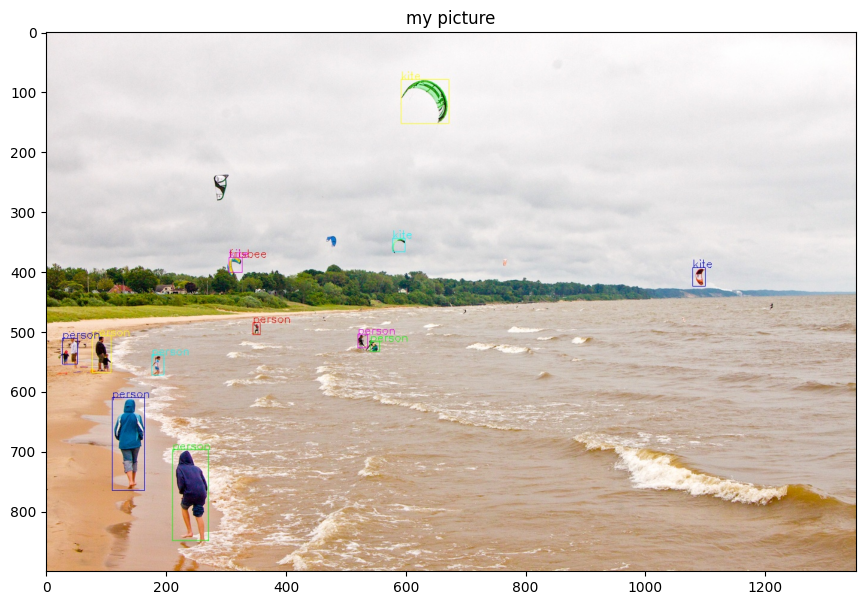

In [5]:
img = cv2.imread(f'./out/out_kite.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,7)) 
plt.imshow(img)
plt.title('my picture')
plt.show()